In [1]:
## Importing Libraries

import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
## Importing the tabular data and cleaning the data as instructions

df = pd.read_csv('NFDB_point_20220901.csv', encoding='ISO-8859-1')
df = df[(df['SRC_AGENCY'] == 'AB') & (df['MONTH'] == 5) & (df['YEAR'] > 2009)]
df.reset_index(drop=True,inplace = True)
df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_5468\3346735957.py:3: DtypeWarning: Columns (2,9,10,14,15,16,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NFDB_point_20220901.csv', encoding='ISO-8859-1')


,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,...,MORE_INFO,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
0,AB,HWF085,NaN,59.766667,-117.088333,2012,5,30,5/30/2012,NaN,...,fueltype: C2,AB-2012-HWF085,NaN,NaN,6/1/2020,AB,4,4,Taiga Plain,Taiga des plaines
1,AB,HWF086,NaN,59.795333,-117.118667,2012,5,30,5/30/2012,NaN,...,fueltype: C2,AB-2012-HWF086,NaN,NaN,6/1/2020,AB,4,4,Taiga Plain,Taiga des plaines
2,AB,HWF087,NaN,59.868667,-116.779667,2012,5,30,5/30/2012,NaN,...,fueltype: C1,AB-2012-HWF087,NaN,NaN,6/1/2020,AB,4,4,Taiga Plain,Taiga des plaines
3,AB,HWF089,NaN,59.897667,-118.367583,2012,5,30,5/30/2012,NaN,...,fueltype: C2,AB-2012-HWF089,NaN,NaN,6/1/2020,AB,4,4,Taiga Plain,Taiga des plaines
4,AB,HWF039,NaN,58.716367,-118.745950,2010,5,1,5/1/2010,NaN,...,fueltype: M2,AB-2010-HWF039,NaN,NaN,6/1/2020,AB,4,4,Taiga Plain,Taiga des plaines


In [3]:
## checking null values

df.isnull().sum()

## Fortunaetly we don't have null values in the columns we need for answering the questions and analysis

SRC_AGENCY       0
FIRE_ID          0
FIRENAME      3931
LATITUDE         0
LONGITUDE        0
YEAR             0
MONTH            0
DAY              0
REP_DATE         0
ATTK_DATE     4414
OUT_DATE       789
DECADE           0
SIZE_HA          0
CAUSE           34
PROTZONE      4414
FIRE_TYPE      807
MORE_INFO      789
CFS_REF_ID       0
CFS_NOTE1     4414
CFS_NOTE2     4414
ACQ_DATE         0
SRC_AGY2         0
ECOZONE          0
ECOZ_REF         0
ECOZ_NAME        0
ECOZ_NOM         0
dtype: int64

In [4]:
## answering the questions in few cells below

print('The year with the most fire was:',df.groupby('YEAR').count().sort_values(by='FIRE_ID', ascending=False ).index[0])

The year with the most fire was: 2013


In [5]:
a = df.sort_values(by = 'SIZE_HA', ascending=False).iloc[0,1]
b = df.sort_values(by = 'SIZE_HA', ascending=False).iloc[0,13]
print(f"The biggest fire was {a}  and the cuase was {b}")


The biggest fire was MWF007  and the cuase was U


In [6]:
print('The cause of the most fires was:',df.groupby('CAUSE').count().sort_values(by='FIRE_ID', ascending=False ).index[0])

The cause of the most fires was: H


In [7]:
print('The number of human fire in 2015 was:',df[df['YEAR'] ==2015].groupby('CAUSE').count().sort_values(by='FIRE_ID', ascending=False ).iloc[0,0])

The number of human fire in 2015 was: 354


In [8]:
# Perform Spearman correlation test
rho, p_value = spearmanr(df[['SIZE_HA']], df[['YEAR']])

# Interpret the results
print("Spearman correlation coefficient:", rho)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")

Spearman correlation coefficient: 0.007730329735222933
p-value: 0.6076369973983471
There is no significant correlation.


In [9]:
# Perform Spearman correlation test
rho, p_value = spearmanr(df[['SIZE_HA']], df[['LATITUDE']])

# Interpret the results
print("Spearman correlation coefficient:", rho)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")

Spearman correlation coefficient: 0.41575574888149064
p-value: 4.445349236139344e-184
There is a significant correlation.


In [10]:
## checkng fire counts for fires smaller than 1000 hectares

print(df.shape)
print(df[df['SIZE_HA'] < 1000].shape)
print('Most of fires are less than 1000 hectares.')

(4414, 26)
(4379, 26)
Most of fires are less than 1000 hectares.


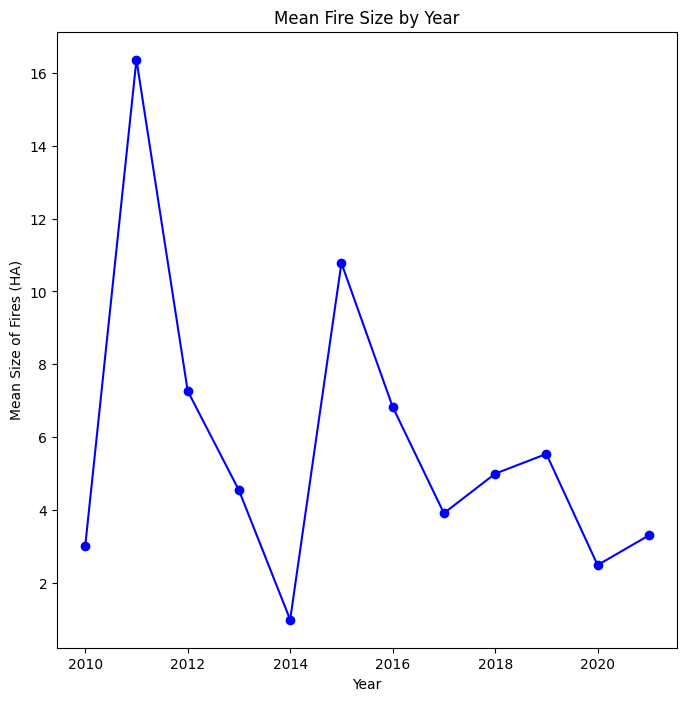

In [11]:
## plotting mean fire sizes per year

df = df[df['SIZE_HA'] < 1000]
result = df.groupby('YEAR')['SIZE_HA'].mean().reset_index()

plt.figure(figsize=(8, 8))
plt.plot(result['YEAR'], result['SIZE_HA'], marker='o', color='blue')
#sns.scatterplot(x='YEAR', y='SIZE_HA', data=result, color='skyblue', s=100)
plt.xlabel('Year')
plt.ylabel('Mean Size of Fires (HA)')
plt.title('Mean Fire Size by Year')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5468\3278837447.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('bins')['SIZE_HA'].mean().reset_index()


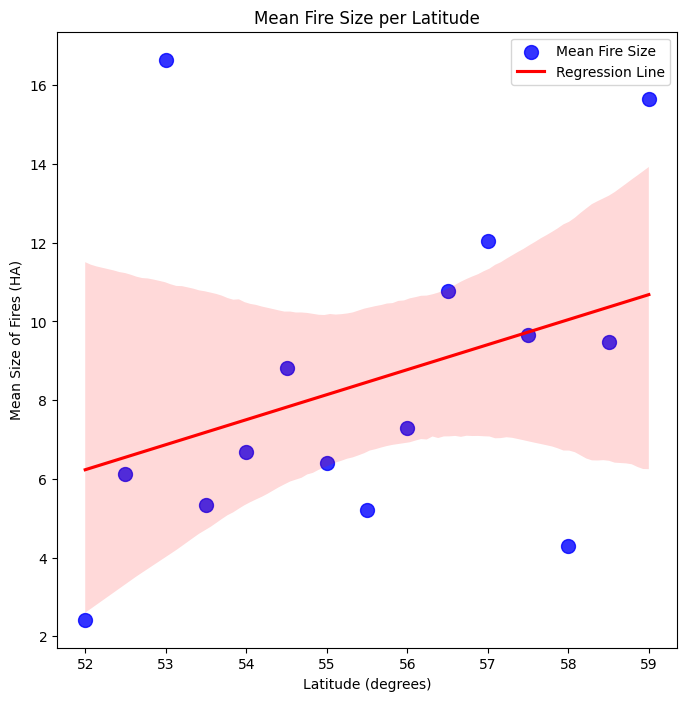

In [12]:
## plotting mean fire sizes per Latitude

df = df[df['SIZE_HA'] < 1000]

# Define the intervals for binning
bins = np.arange(start=52, stop=60, step=0.5)

# Use pd.cut to bin the data and create a new column with the bin labels
df['bins'] = pd.cut(df['LATITUDE'], bins=bins, labels= np.arange(start=52, stop=59.5, step=0.5))

result = df.groupby('bins')['SIZE_HA'].mean().reset_index()

plt.figure(figsize=(8, 8))
#sns.scatterplot(x='bins', y='SIZE_HA', data=result, color='skyblue', s=100)
sns.regplot(x='bins', y='SIZE_HA', data=result, scatter_kws={'color': 'blue' , 's' : 100}, line_kws={'color': 'red'}, label='Regression Line')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Mean Size of Fires (HA)')
plt.title('Mean Fire Size per Latitude')
plt.legend(['Mean Fire Size', 'Regression Line'])
plt.show()